[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/abs/1502.01852)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

[Resnet](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py)


In [10]:
import torch
from torch.nn import functional as F

import matplotlib.pyplot as plt

## Expect Initial Loss


In [11]:
X = torch.randn((27, 64))
W = torch.randn((64, 27)) * 0.01
b = torch.randn(27) * 0

hpre = X @ W + b
h = F.tanh(hpre)

F.cross_entropy(h, torch.tensor([1] * 27))

tensor(3.2977)

In [12]:
torch.tensor((1 / 27)).log()

tensor(-3.2958)

## Dead Neurons


torch.Size([10, 100])

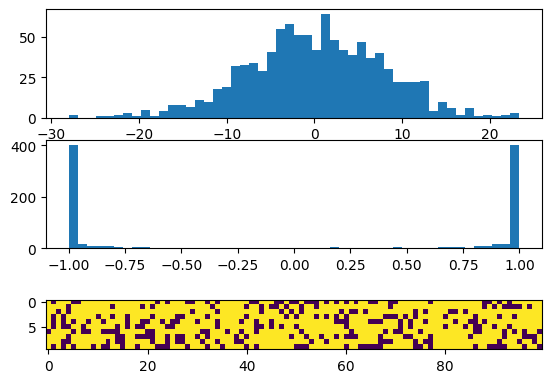

In [13]:
X = torch.randn((10, 64))
W = torch.randn((64, 100))

hpre = X @ W
h = F.tanh(hpre)

fig, axs = plt.subplots(3)
axs[0].hist(hpre.reshape(-1), bins=50)
axs[1].hist(h.reshape(-1), bins=50)
axs[2].imshow(h.abs() > 0.99)
h.shape

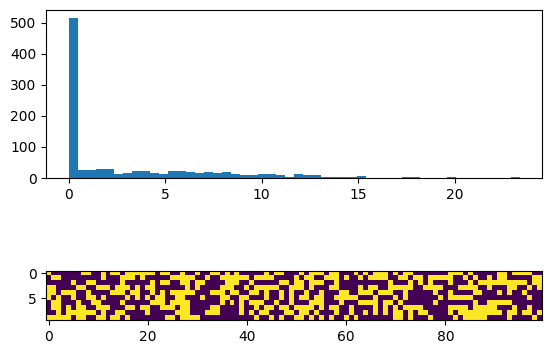

In [14]:
h = F.relu(hpre)
fig, axs = plt.subplots(2)
axs[0].hist(h.reshape(-1), bins=50)
axs[1].imshow(h.abs() > 0.99)

In [15]:
b = torch.tanh(torch.tensor([9.0, 999, 9999], requires_grad=True))
b.retain_grad()
a = F.cross_entropy(b, torch.tensor([1.0, 1, 1]))
a.retain_grad()
a.backward()
b.detach(), b.grad, a.grad

(tensor([1.0000, 1.0000, 1.0000]),
 tensor([-5.9605e-08, -5.9605e-08, -5.9605e-08]),
 tensor(1.))

## Dead Neuron Fix


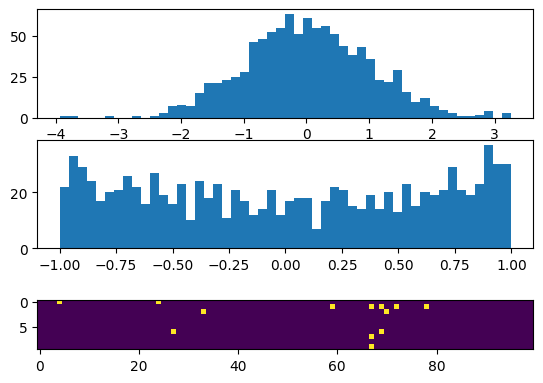

In [16]:
X = torch.randn((10, 64))
W = torch.randn((64, 100)) * 0.12

hpre = X @ W
h = F.tanh(hpre)

fig, axs = plt.subplots(3)
axs[0].hist(hpre.reshape(-1), bins=50)
axs[1].hist(h.reshape(-1), bins=50)
axs[2].imshow(h.abs() > 0.99)

## Unnormalized


tensor(0.0068) tensor(0.9916)
tensor(-0.0052) tensor(3.1556)


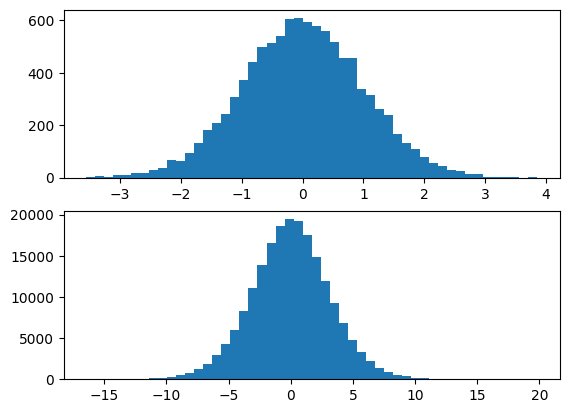

In [38]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200))
print(X.mean(), X.std())
h = X @ W
print(h.mean(), h.std())

fig, axs = plt.subplots(2)
axs[0].hist(X.view(-1), bins=50)
axs[1].hist(h.view(-1), bins=50)

## Normalized


tensor(0.0102) tensor(0.9901)
tensor(-0.0004) tensor(0.9787)


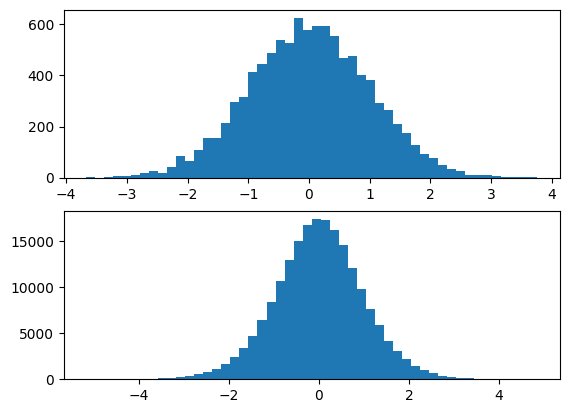

In [36]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200)) / 10**0.5  # fan-in
print(X.mean(), X.std())
h = X @ W
print(h.mean(), h.std())

fig, axs = plt.subplots(2)
axs[0].hist(X.view(-1), bins=50)
axs[1].hist(h.view(-1), bins=50)

## Batch Norm


In [119]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200))
print(X.mean(), X.std())
h = X @ W
h = (h - h.mean(0, keepdim=True)) / h.std(0, keepdim=True)
print(h.mean(), h.std())

tensor(-0.0095) tensor(1.0068)
tensor(1.0681e-09) tensor(0.9995)


In [115]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200))
print(X.mean(), X.std())
h = X @ W
h = (h - h.mean(1, keepdim=True)) / h.std(1, keepdim=True)
print(h.mean(), h.std())

tensor(0.0057) tensor(1.0019)
tensor(-4.5776e-10) tensor(0.9975)
